## Australina Housing Market Price Prediction using regularization
------------------------------------------------------------------------------------------------------

Steps:
1. EDA - Understanding data, cleaning, and preparation
2. Building model and evaluation
3. Summary - Observations and inferences


In [1]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import os

# hiding undesired warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read train data
data = pd.read_csv("train.csv", encoding = 'utf-8')

# print dimensions
print(data.shape)

# print 5 rows of data
print(data.head())

# print column info
print(data.info())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [3]:
# drop ID Column
data = data.drop(['Id'], axis=1)

In [4]:
# find numerical columns outliers
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
90%     120.000000    96.000000   14381.700000     8.000000     7.000000   
95%     160.000000   107.000000   17401.150000     8.000000     8.000000   
99%     190.000000   141.000000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
90%    2006.000000   2006.000000   335.000000  1065.500000   117.200000  ...   
95%    2007.000000   2007.000000   456.000000  1274.000000   396.200000  ...   
99%    2009.000000   2009.000000   791.920000  1572.410000   830.380000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 37 columns]

In [5]:
# Finding percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64

In [6]:
# function to return columns with high null values
def findNulls(data):
  data.columns[data.isnull().any()]

  na = data.isnull().sum()/len(data)*100
  na = na[na>0]
  na.sort_values(inplace=True, ascending=False)
  return na

In [7]:
# printing columns with high nulls
print(findNulls(data))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [8]:
# replacing the nulls with 'none' for categorical variables
categoricalVariableCols = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in categoricalVariableCols:
    data[i].fillna("none", inplace=True)

In [9]:
# again printing columns with high nulls
print(findNulls(data))

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


In [10]:
# describing the numberic columns
data[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
90%      96.000000  2006.000000   335.000000
95%     107.000000  2007.000000   456.000000
99%     141.000000  2009.000000   791.920000
max     313.000000  2010.000000  1600.000000

In [11]:
# "LotFrontage" is Linear feet of street connected to property.
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# updating the null values with median as there is a fair distribution
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [12]:
# describing the updated numberic columns
data[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

LotFrontage  GarageYrBlt   MasVnrArea
count  1460.000000  1460.000000  1460.000000
mean     70.199658  1978.589041   103.117123
std      22.431902    23.997022   180.731373
min      21.000000  1900.000000     0.000000
25%      60.000000  1962.000000     0.000000
50%      70.000000  1980.000000     0.000000
75%      80.000000  2001.000000   164.250000
90%      92.000000  2006.000000   335.000000
95%     104.000000  2007.000000   456.000000
99%     137.410000  2009.000000   791.280000
max     313.000000  2010.000000  1600.000000

In [13]:
# describing Electrical column
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [14]:
data["Electrical"].dropna(inplace=True)

In [15]:
# describing the updated Electrical column
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [16]:
# checking back shape post cleanup
data.shape

(1460, 80)

In [17]:
# find all numeric columns for bar plot
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

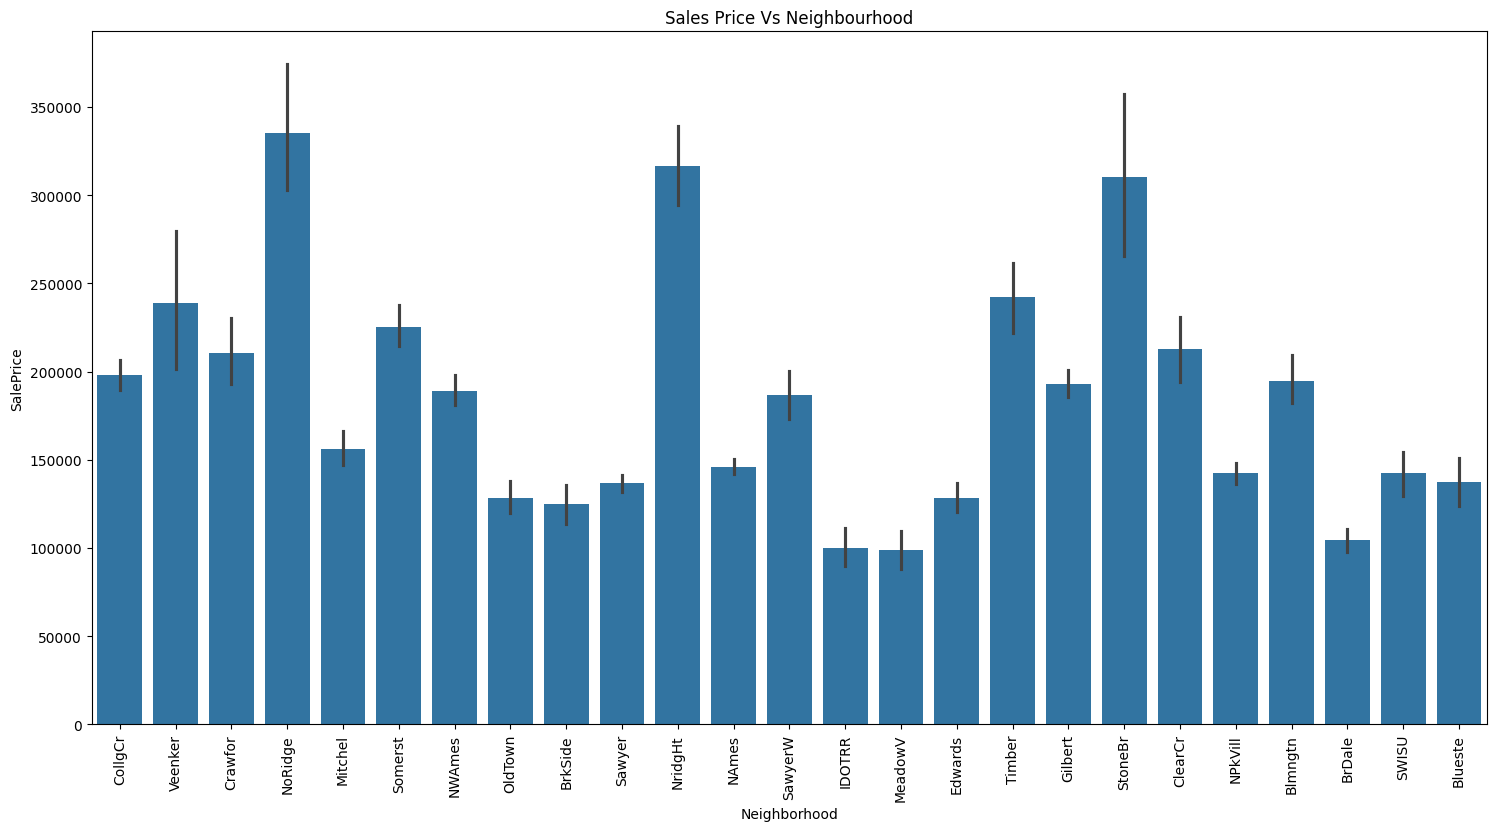

In [18]:
# 'SalePrice' against 'Neighborhood' bar chart

plt.figure(figsize=(18, 9))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price Vs Neighbourhood")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

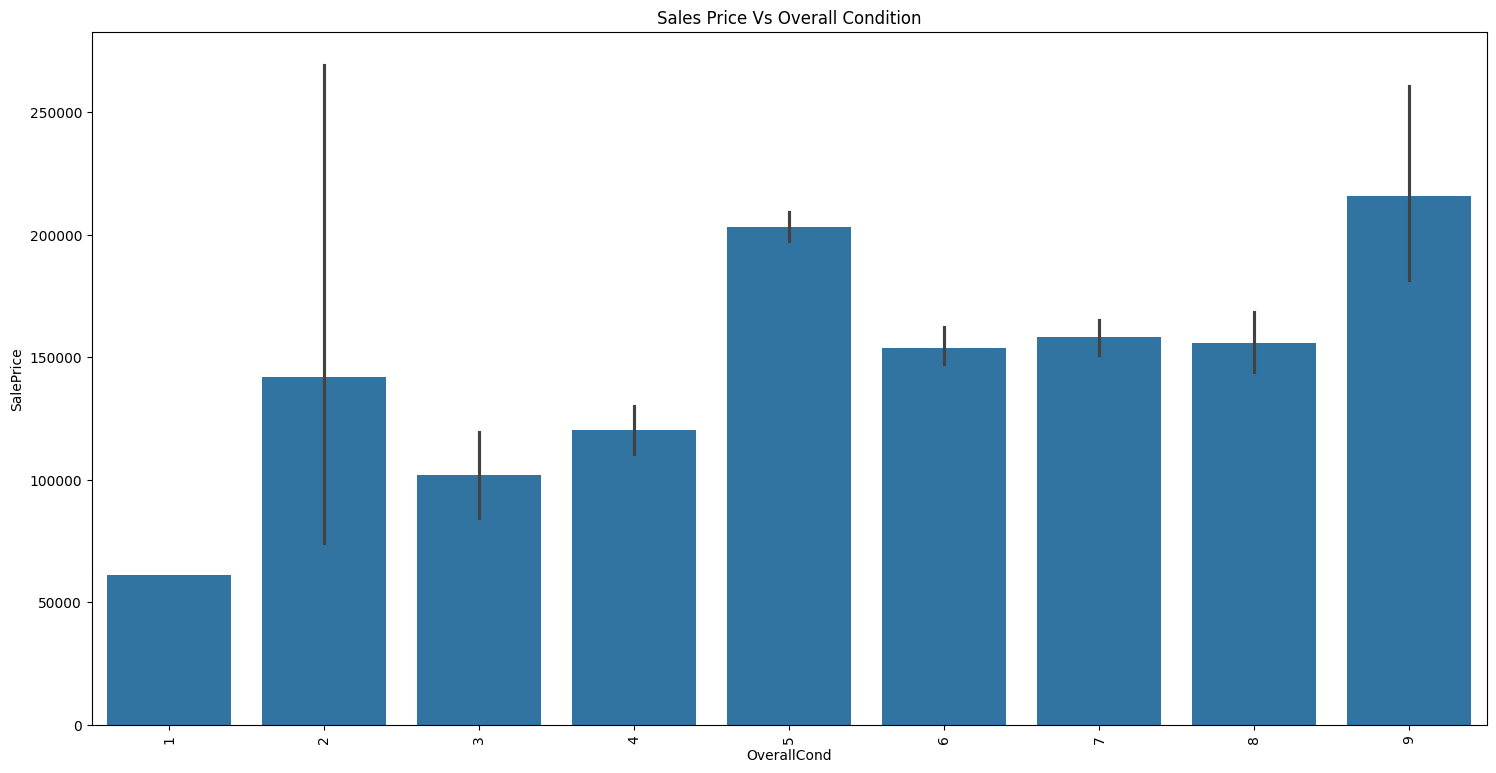

In [19]:
# 'OverallCond' against 'Saleprice' bar chart

plt.figure(figsize=(18, 9))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price Vs Overall Condition")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

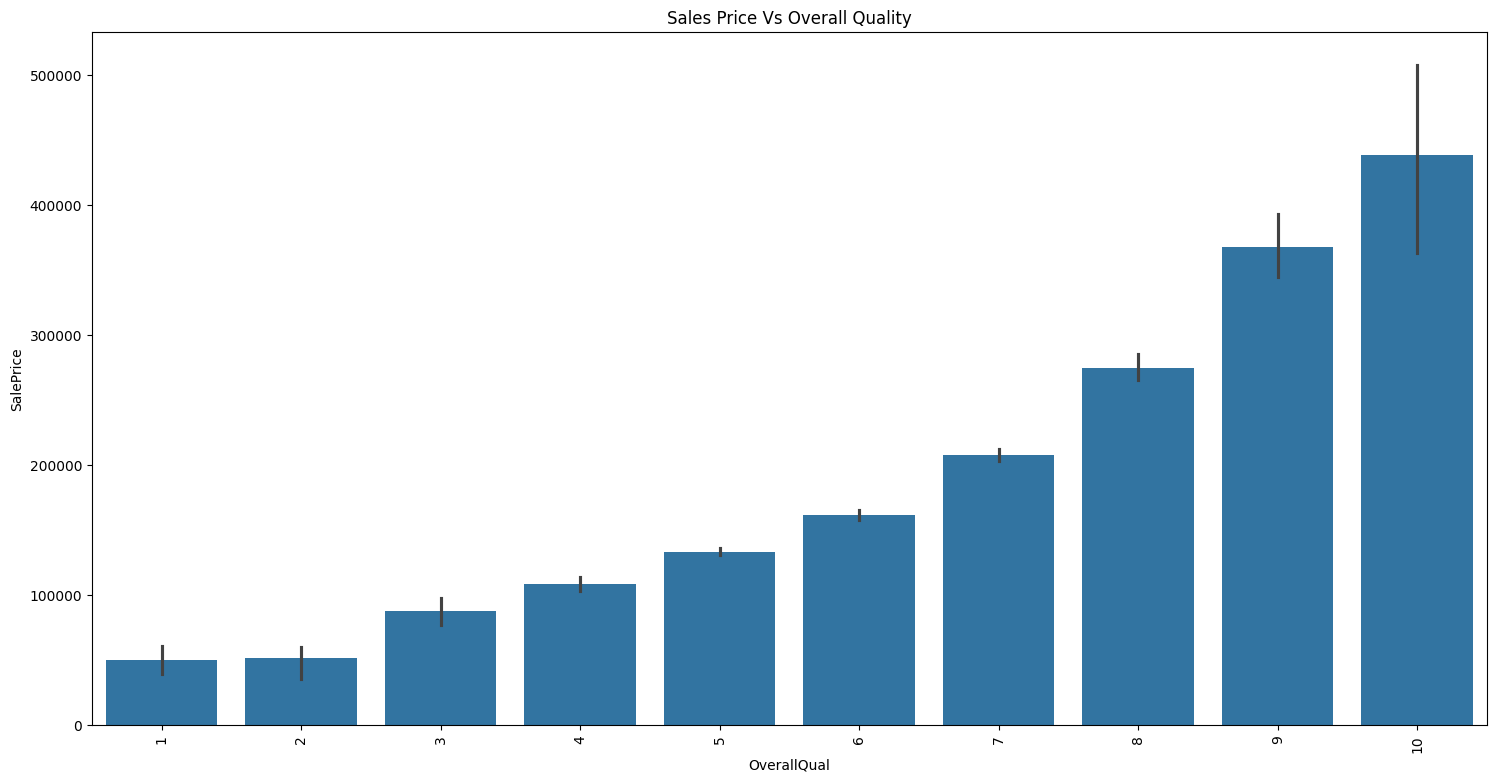

In [20]:
# 'OverallQual' against 'SalePrice' bar chart

plt.figure(figsize=(18, 9))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price Vs Overall Quality")
plt.xticks(rotation=90)

In [21]:
# Observation: Increase in the overall quality is increasing the sale price. It is a direct positive effect.

<Axes: xlabel='SalePrice', ylabel='Density'>

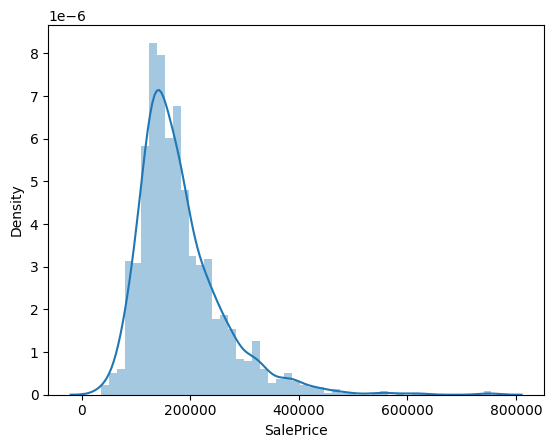

In [22]:
sns.distplot(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

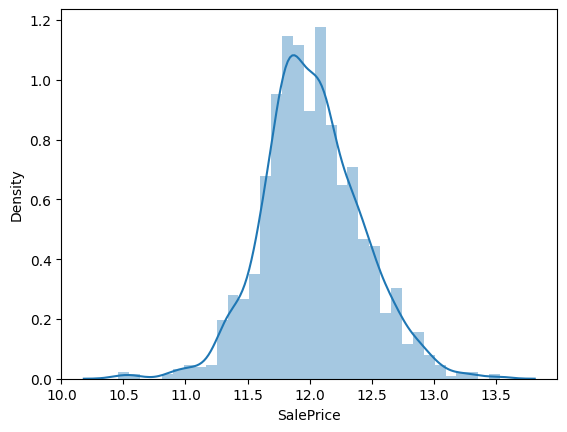

In [23]:
#Log Transformation to let near zero values to be calculated accurately and the distplot appears centered
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])

In [24]:
# correlation matrix
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

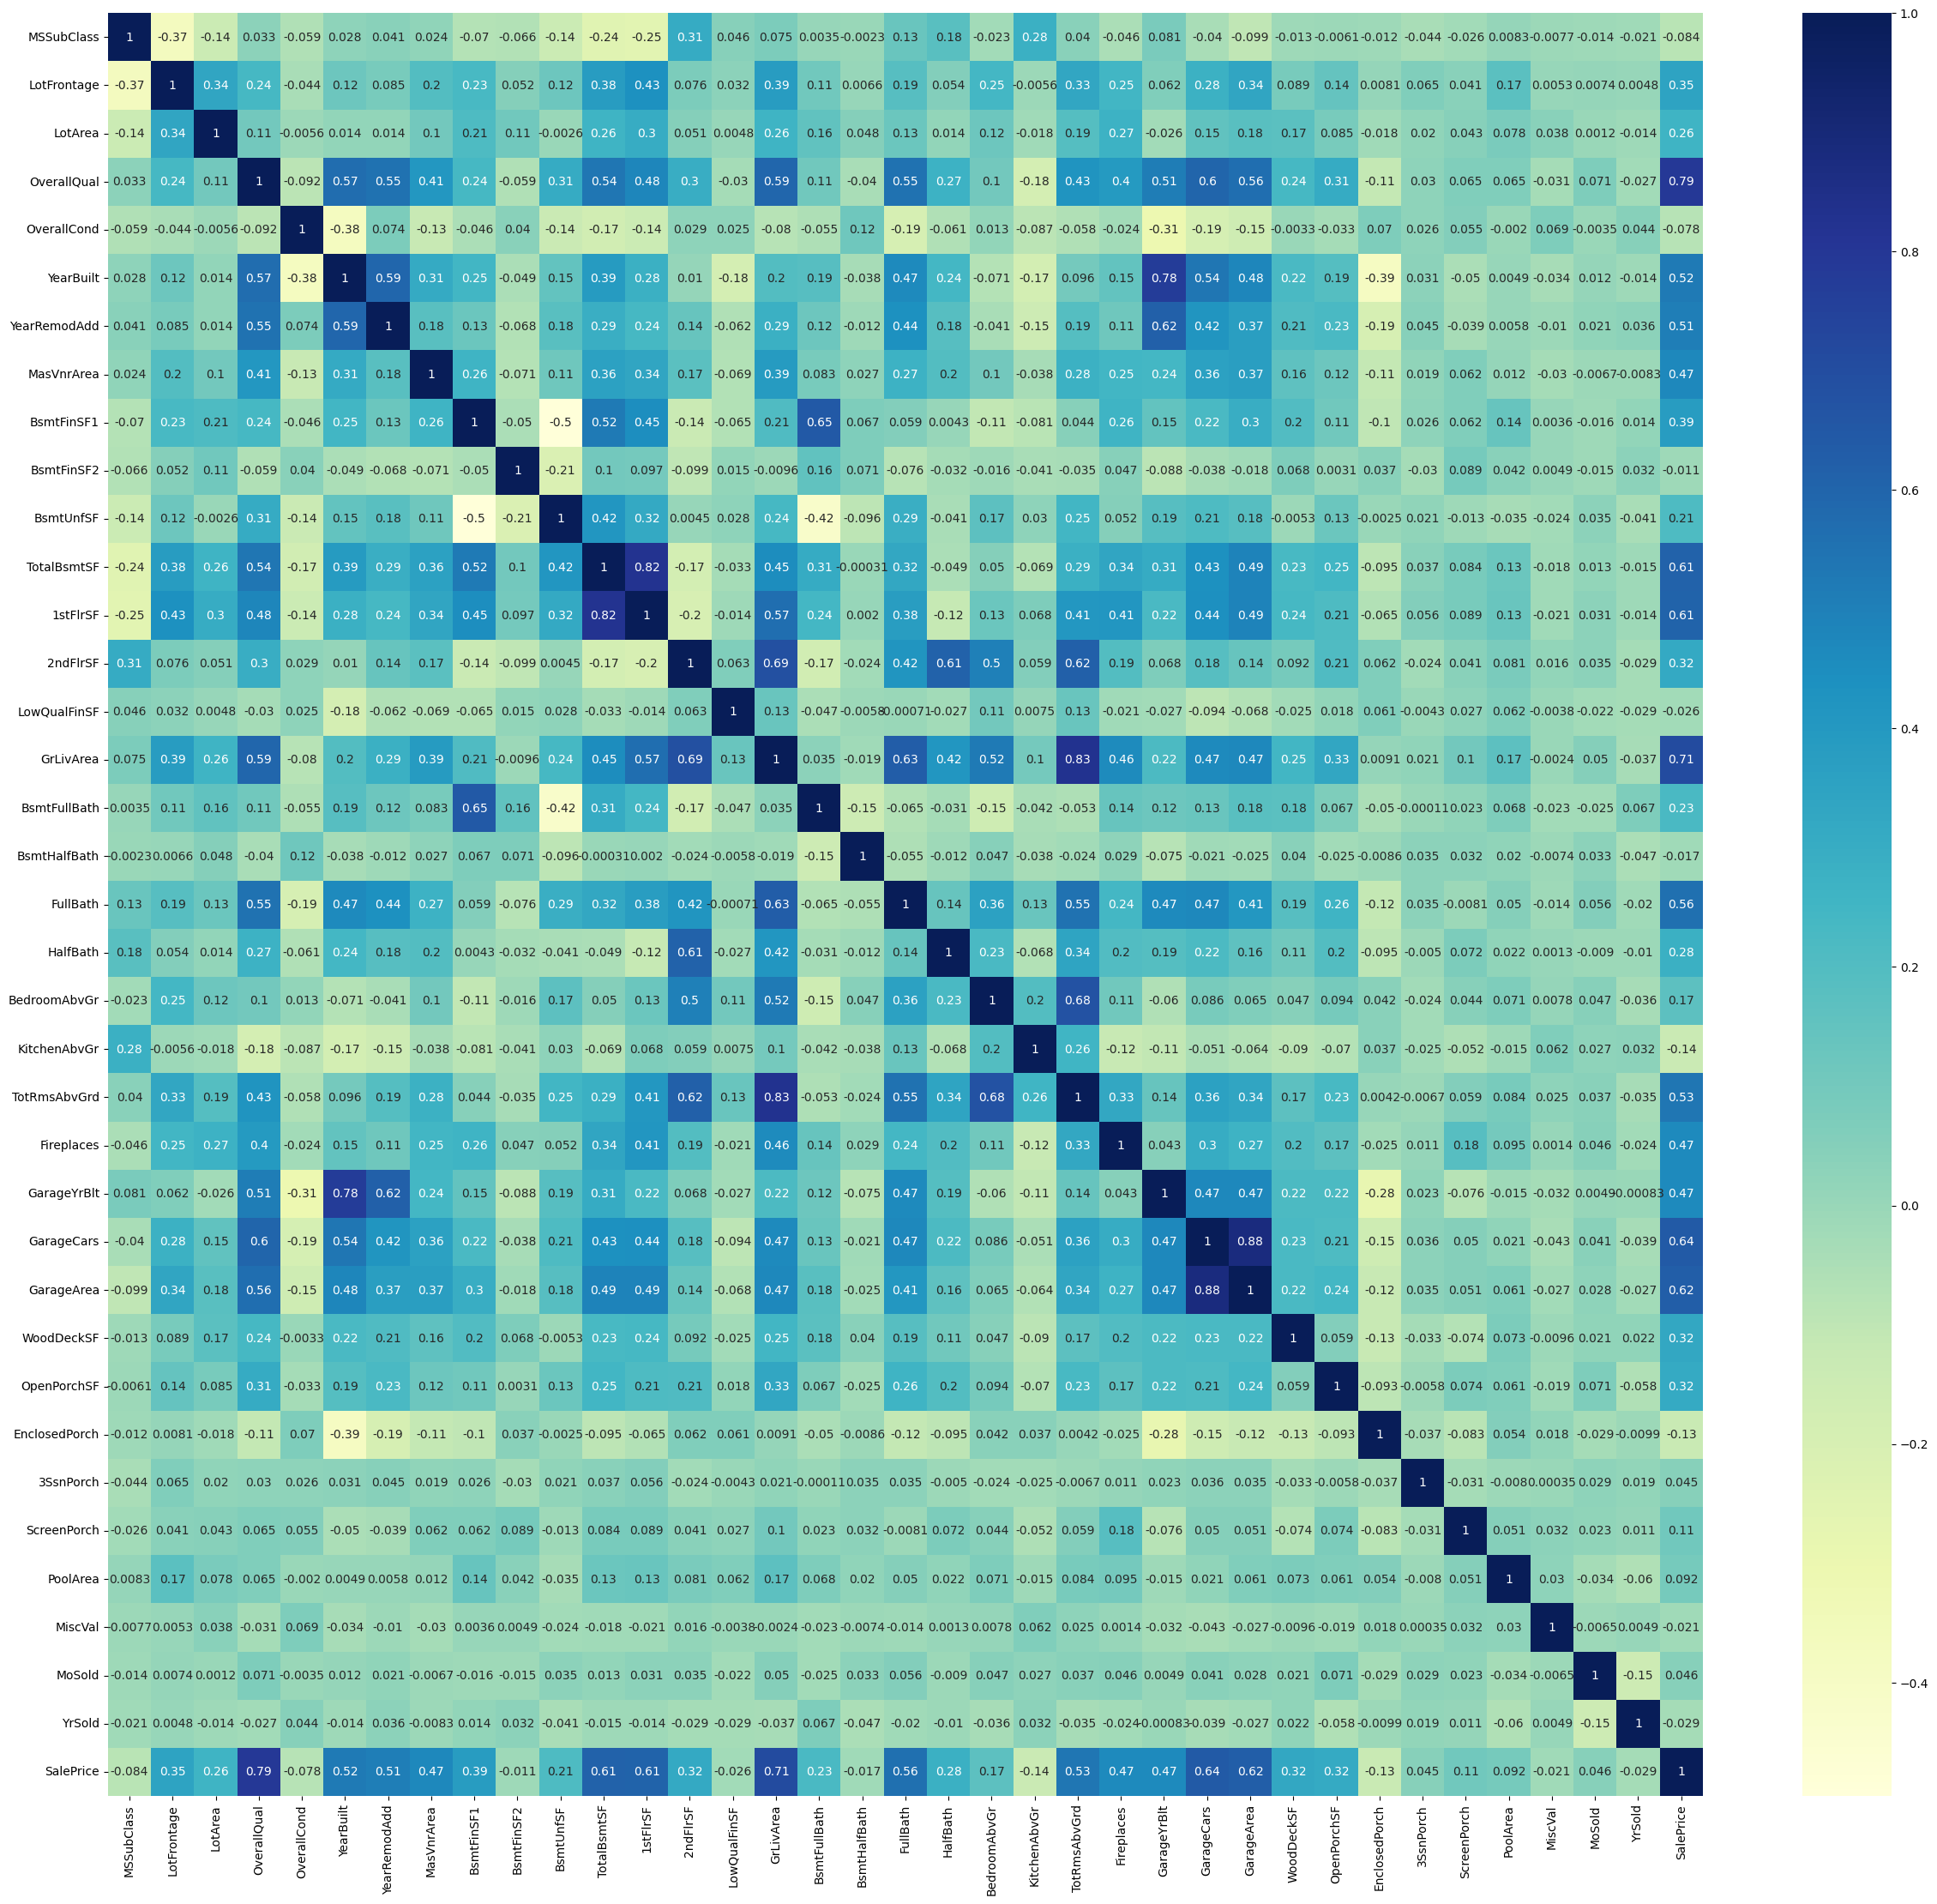

In [25]:
# plotting correlations on a heatmap

plt.figure(figsize=(30,27))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

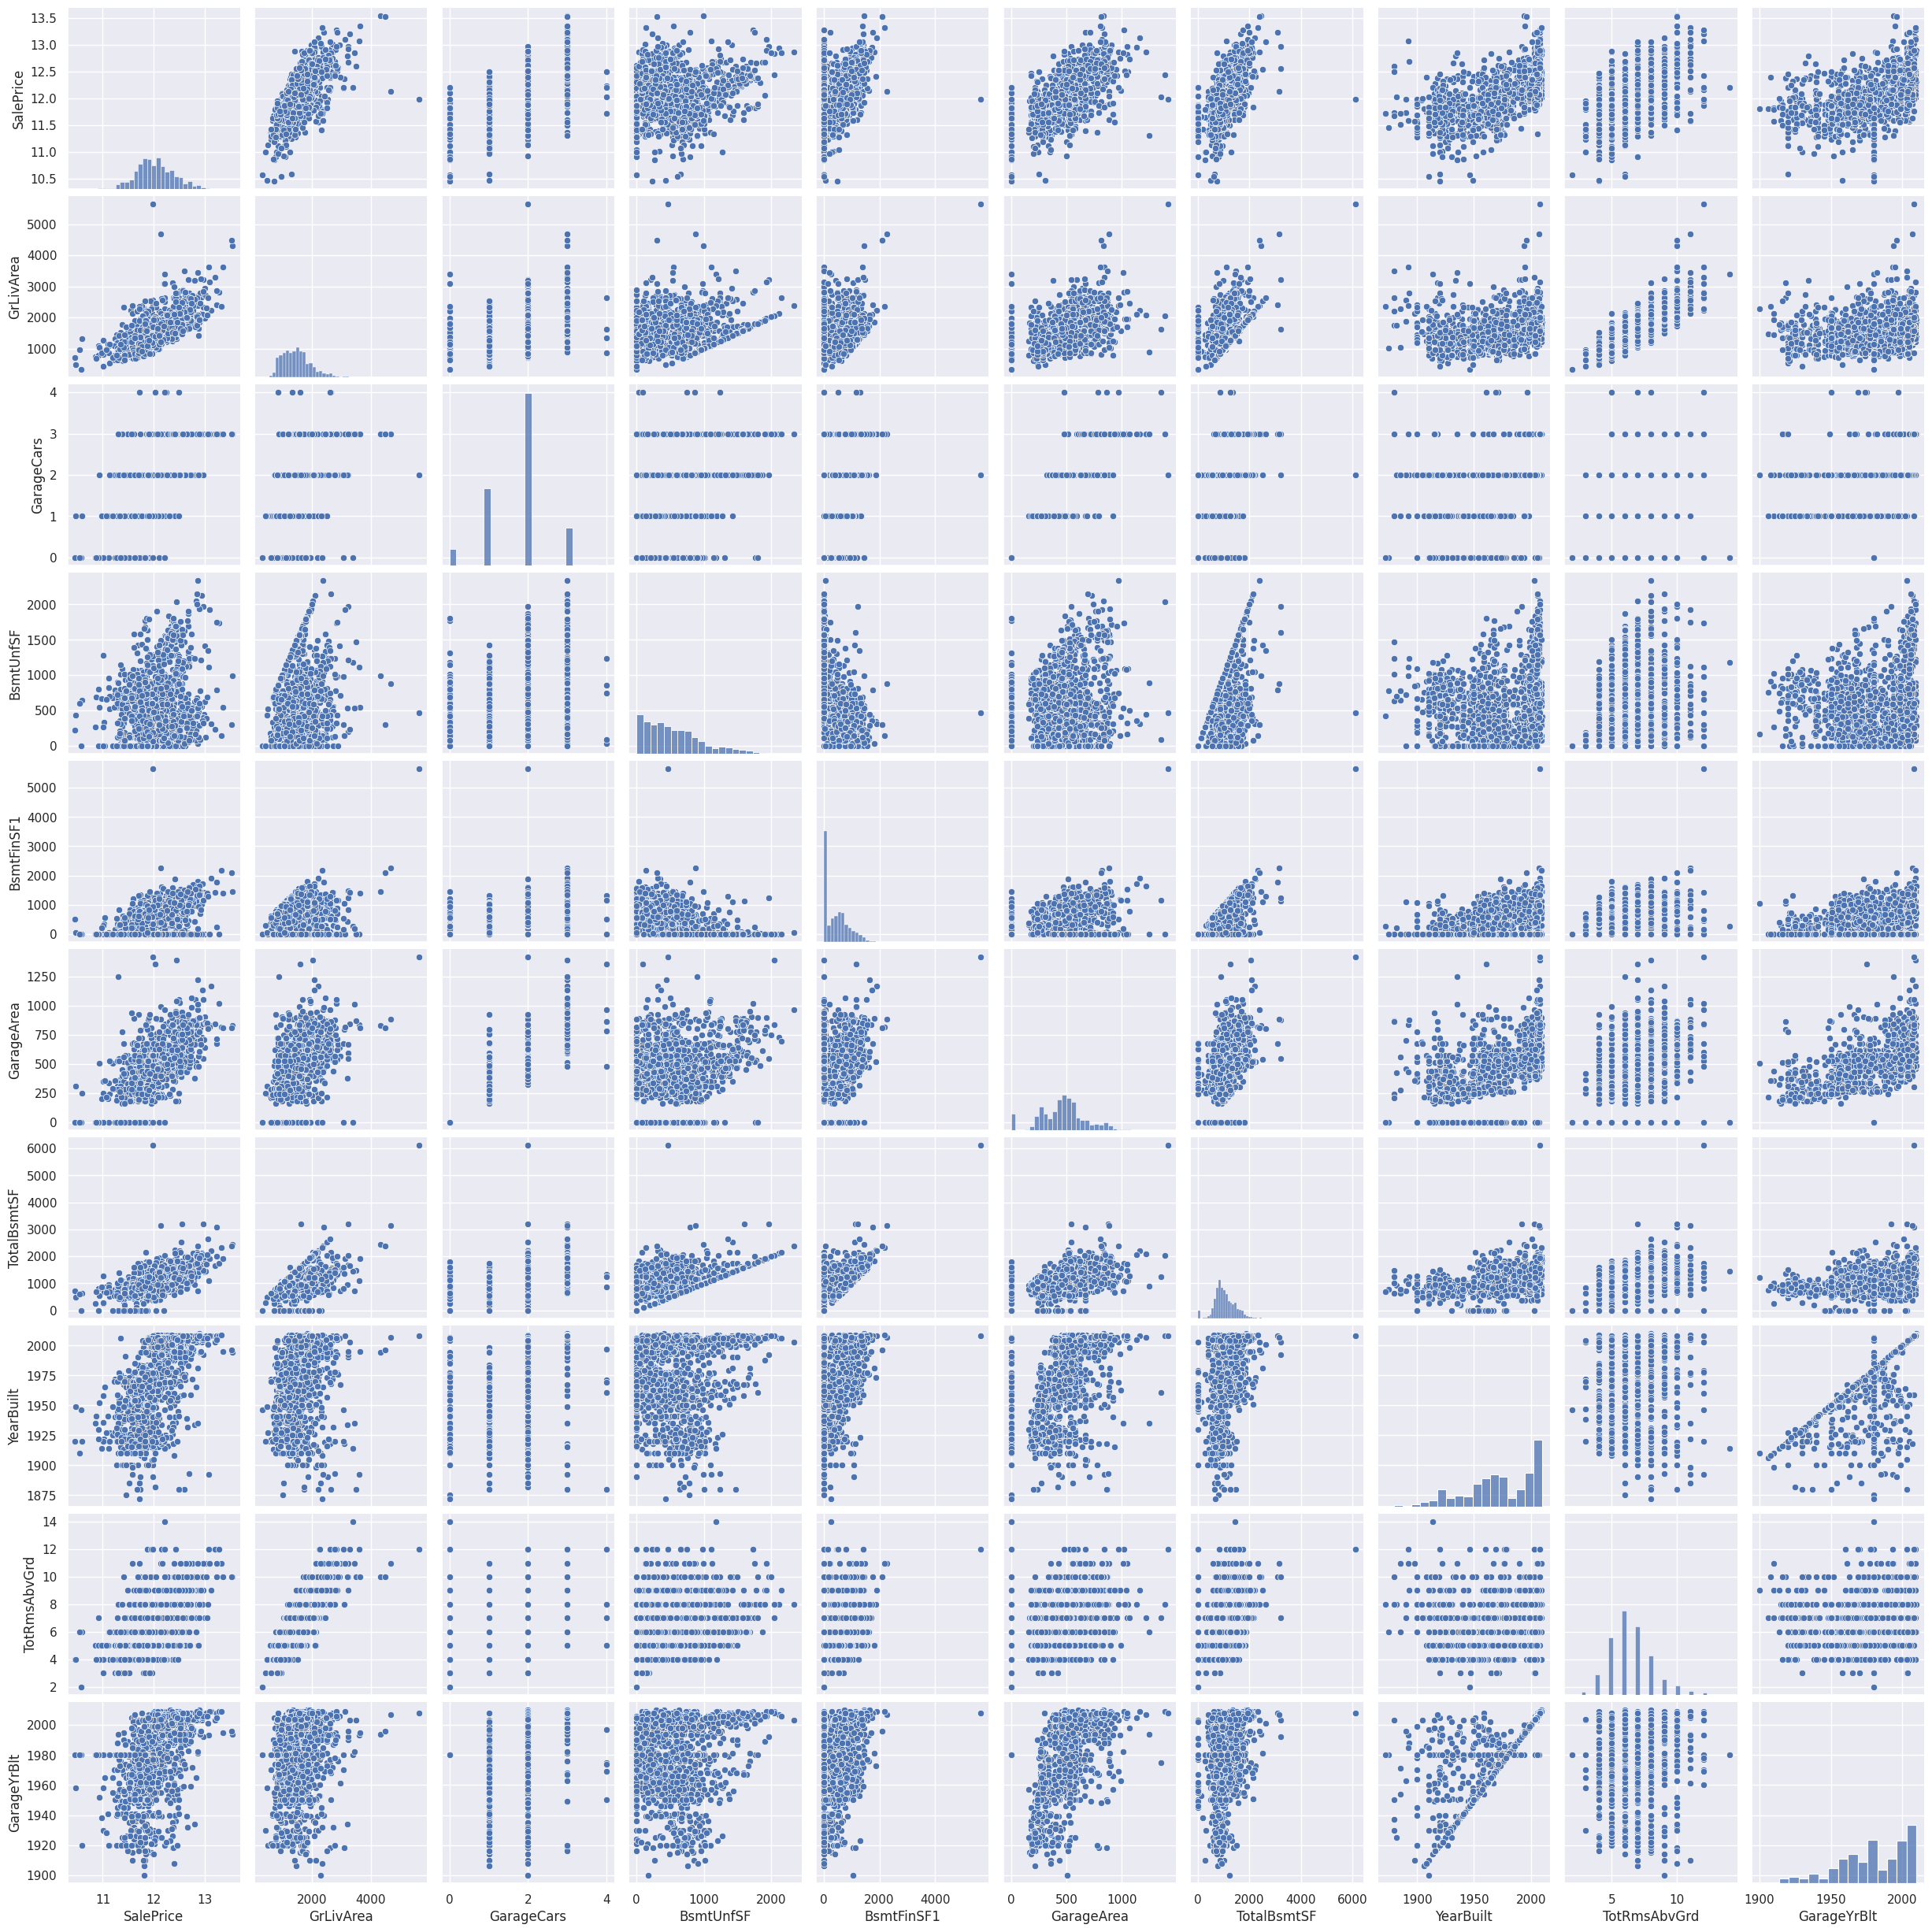

In [26]:
#check the predictive power of correlated columns
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [27]:
# based on scatter plot and correlation dropping columns that don't contribute to SalePrice
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)

In [ ]:
#printing numeric columns
data.select_dtypes(exclude=['object'])

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   2.583824  
1          5    2007   2.573300  
2          9    2008   2.589054  
3          2    2006   2.553297  
4         12    2008   2.597433  
...      ...     ...        ...  
1455       8    2007   2.570514  
1456       2    2010   2.584365  
1457       5    2010   2.602181  
1458       4    2010   2.554469  
1459       6    2008   2.557351  

[1460 rows x 33 columns]

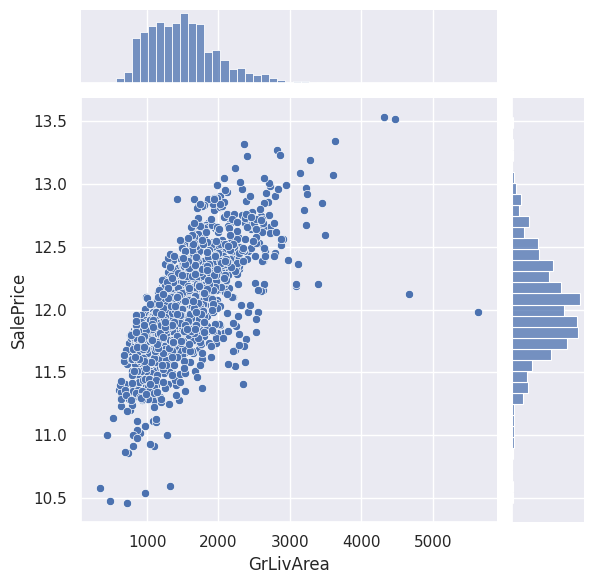

In [28]:
# GrLivArea vs SalePrice
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [29]:
# function to remove outliers identified in above step
def removeOutliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

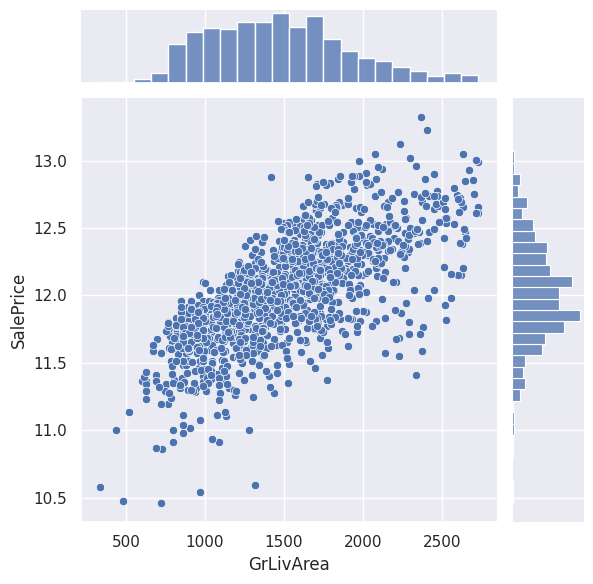

In [30]:
# Removing some outliers of 'GrLivArea'
data = removeOutliers(data,'GrLivArea')

# Again plot GrLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

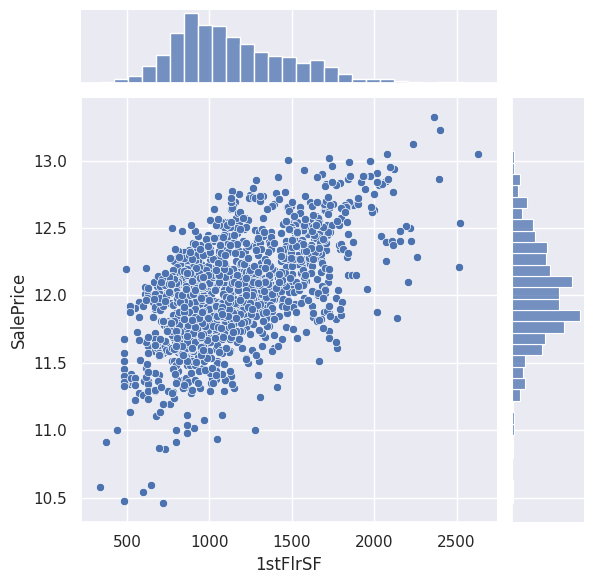

In [31]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

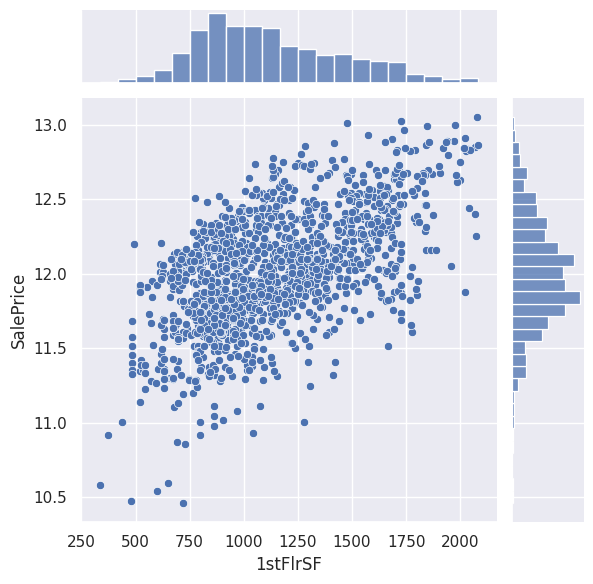

In [32]:
# Removing some outliers of '1stFlrSF'
data = removeOutliers(data,'1stFlrSF')

# Again plot 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

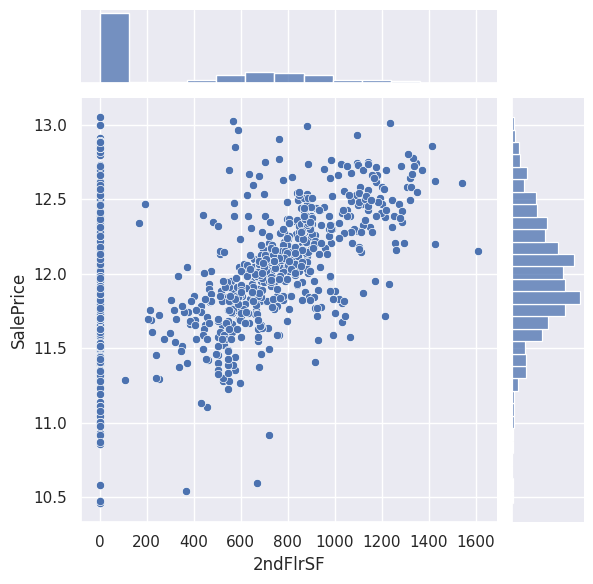

In [33]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

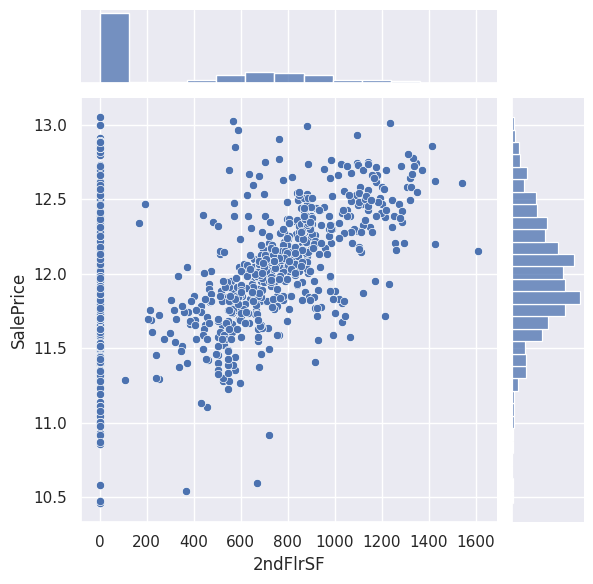

In [34]:
# Removing some outliers of '2ndFlrSF'
data = removeOutliers(data,'2ndFlrSF')

# Again plot 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

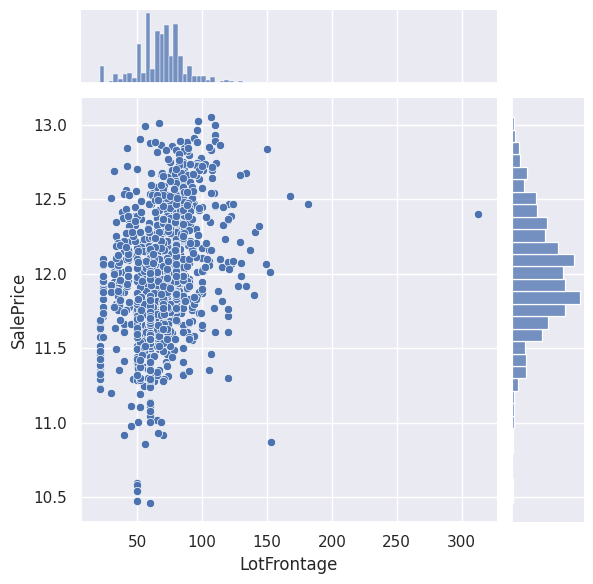

In [35]:
# Lot frontage vs SalePrice
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

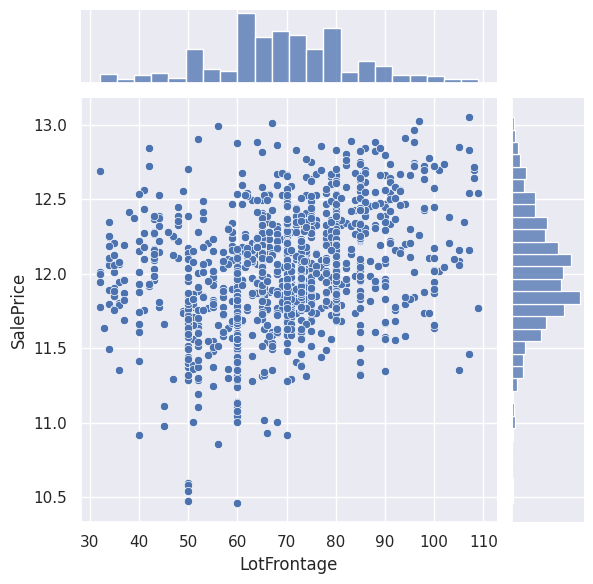

In [36]:
# Removing some outliers of 'LotFrontage'
data = removeOutliers(data,'LotFrontage')

# Again plot LotFrontage vs SalePrice
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

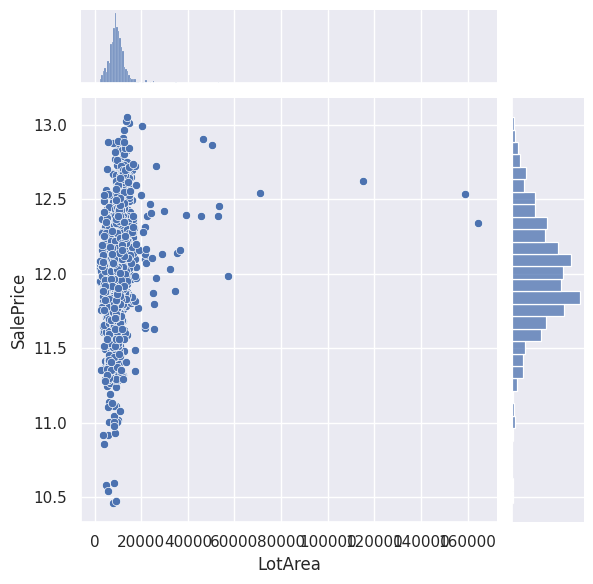

In [37]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

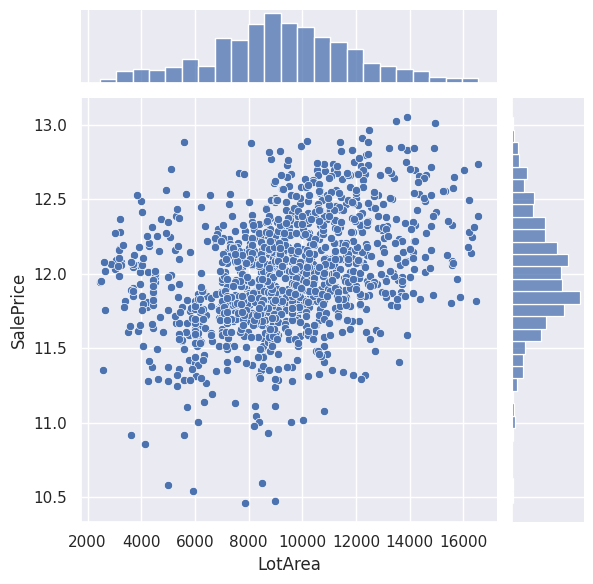

In [38]:
# Removing some outliers of 'LotArea'
data = removeOutliers(data,'LotArea')

# Again plot LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

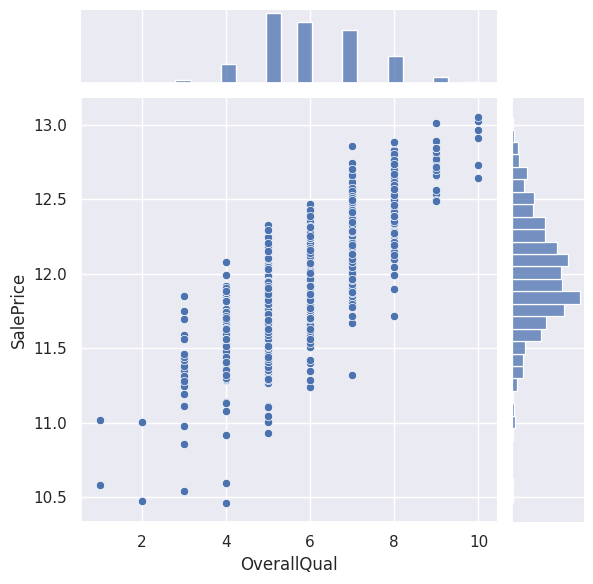

In [39]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

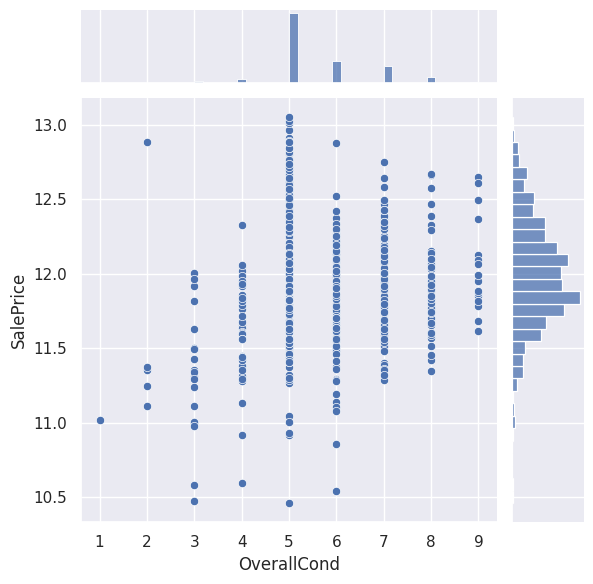

In [40]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

#### It can be observed from jointplot that Ground, First and Second level houses has a steady increase

In [41]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...   none  none        none       0   
1         Lvl    AllPub       FR2  ...   none  none        none       0   
2         Lvl    AllPub    Inside  ...   none  none        none       0   
3         Lvl    AllPub    Corner  ...   none  none        none       0   
4         Lvl    AllPub       FR2  ...   none  none        none       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  PropAge  
0      2   2008        WD         Normal  12.247699        5  
1      5   2007        WD         Normal  12.109016       31  
2      9   2008        WD         Normal  12.317171        7  
3      2   2006        WD        Abnorml  11.849405       91  
4     12   2008        WD         Normal  12.429220        8  

[5 rows x 77 columns]

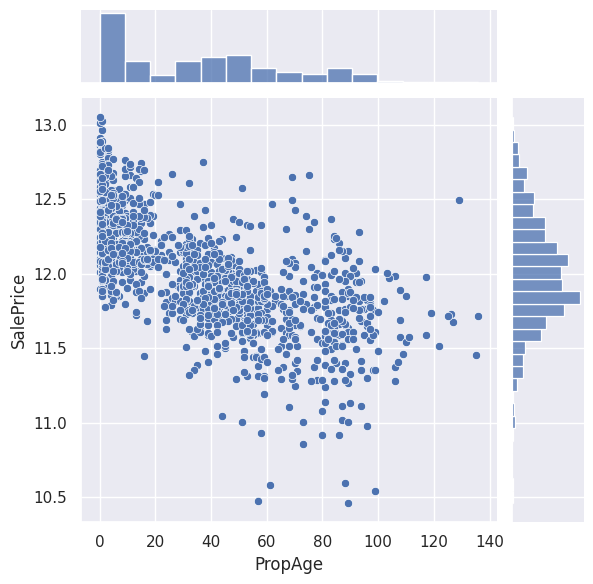

In [42]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

#### As property age increases there is a decrease in saleprice i.e newer properties, show high saleprice

In [43]:
# dropping unrequired columns
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0   none  none   
1         Lvl    AllPub       FR2  ...           0        0   none  none   
2         Lvl    AllPub    Inside  ...           0        0   none  none   
3         Lvl    AllPub    Corner  ...           0        0   none  none   
4         Lvl    AllPub       FR2  ...           0        0   none  none   

  MiscFeature MiscVal  SaleType  SaleCondition  SalePrice PropAge  
0        none       0        WD         Normal  12.247699       5  
1        none       0        WD         Normal  12.109016      31  
2        none       0        WD         Normal  12.317171       7  
3        none       0        WD        Abnorml  11.849405      91  
4        none       0        WD         Normal  12.429220       8  

[5 rows x 73 columns]

In [44]:
data.Utilities.value_counts()

Utilities
AllPub    1249
NoSeWa       1
Name: count, dtype: int64

In [45]:
data.Street.value_counts()

Street
Pave    1248
Grvl       2
Name: count, dtype: int64

In [46]:
# Dropping columns with very low variance
data = data.drop(['Utilities'], axis = 1)
data = data.drop(['Street'], axis = 1)

In [47]:
# select numeric columns to check variance
data_numeric= data.select_dtypes(include=['float64', 'int64'])
data_numeric

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60         65.0     8450            7            5       196.0   
1             20         80.0     9600            6            8         0.0   
2             60         68.0    11250            7            5       162.0   
3             70         60.0     9550            7            5         0.0   
4             60         84.0    14260            8            5       350.0   
...          ...          ...      ...          ...          ...         ...   
1455          60         62.0     7917            6            5         0.0   
1456          20         85.0    13175            6            6       119.0   
1457          70         66.0     9042            7            9         0.0   
1458          20         68.0     9717            5            6         0.0   
1459          20         75.0     9937            5            6         0.0   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  GarageArea  \
0            706           0          856       856  ...         548   
1            978           0         1262      1262  ...         460   
2            486           0          920       920  ...         608   
3            216           0          756       961  ...         642   
4            655           0         1145      1145  ...         836   
...          ...         ...          ...       ...  ...         ...   
1455           0           0          953       953  ...         460   
1456         790         163         1542      2073  ...         500   
1457         275           0         1152      1188  ...         252   
1458          49        1029         1078      1078  ...         240   
1459         830         290         1256      1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  SalePrice  PropAge  
0            0        0  12.247699        5  
1            0        0  12.109016       31  
2            0        0  12.317171        7  
3            0        0  11.849405       91  
4            0        0  12.429220        8  
...        ...      ...        ...      ...  
1455         0        0  12.072547        8  
1456         0        0  12.254868       32  
1457         0     2500  12.493133       69  
1458         0        0  11.864469       60  
1459         0        0  11.901590       43  

[1250 rows x 30 columns]

In [48]:
for i in data_numeric:
    print(data[i].value_counts())

MSSubClass
20     465
60     258
50     131
120     84
30      65
70      54
80      52
90      49
190     26
85      19
160     18
45      12
75      11
40       3
180      3
Name: count, dtype: int64
LotFrontage
60.0     149
70.0      94
80.0      93
65.0      72
73.0      63
        ... 
106.0      1
39.0       1
33.0       1
104.0      1
88.5       1
Name: count, Length: 82, dtype: int64
LotArea
7200     25
9600     22
6000     17
9000     14
10800    14
         ..
2500      1
10289     1
12243     1
9490      1
9717      1
Name: count, Length: 897, dtype: int64
OverallQual
5     360
6     315
7     275
8     140
4      99
9      31
3      19
10      6
2       3
1       2
Name: count, dtype: int64
OverallCond
5    701
6    221
7    175
8     67
4     44
3     20
9     16
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0      759
108.0      8
72.0       8
180.0      8
120.0      6
        ... 
259.0      1
209.0      1
472.0      1
263.0      1
119.0      1
Name: count, Le

In [49]:
 # dropping columns with very low variance
 data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)


In [58]:
numerical_columns = list(data_numeric)
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'PropAge']

In [60]:
data_categorical = data.select_dtypes(include=['object'])
categorical_columns = list(data_categorical)
categorical_columns

[]

In [61]:
# converting catergorical columns to numerical by adding dummy columns
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 207 columns]

In [62]:
# putting all columns except for SalePrice in X
X = data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 206 columns]

In [63]:
# Putting response variable to y
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [65]:
numerical_columns.remove('SalePrice')
numerical_columns.remove('MiscVal')
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']


In [66]:
scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])


In [67]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1290    0.693361     0.288224  1.846006    -0.786888     1.240965   -0.026264   
286    -0.104217     0.557197  0.228344    -0.020154     1.240965   -0.586937   
975     2.820234     0.321846 -2.439712     0.746580    -0.540568   -0.586937   
376     0.826290    -0.787669 -0.123158    -0.786888    -0.540568   -0.586937   
833    -0.901794     2.103793  0.309863    -0.020154     0.350198    0.586564   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1290    1.435668   -0.282343     0.346532  0.085887  ...           False   
286     0.426709   -0.282343    -0.292164 -0.128995  ...           False   
975     0.526630   -0.282343    -0.928198 -1.450361  ...           False   
376    -0.309294   -0.282343    -0.403935 -0.677426  ...           False   
833    -0.557878    2.042727     1.315220  1.253307  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1290           False         False         False         True   
286            False         False         False         True   
975            False         False         False         True   
376            False         False         False         True   
833            False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1290                  False                 False                 False   
286                   False                 False                 False   
975                   False                 False                 False   
376                   False                 False                 False   
833                   False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
1290                  True                  False  
286                   True                  False  
975                   True                  False  
376                   True                  False  
833                   True                  False  

[5 rows x 206 columns]

In [68]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
737     0.169894     0.234109  0.371161     1.395671    -0.502345   -0.549132   
628     0.169894     0.095583  0.783740    -0.731876    -0.502345    0.568599   
1026   -0.845409     0.303373 -0.048637    -0.731876    -0.502345    1.337039   
143    -0.845409     0.649688  0.324958     0.686489    -0.502345    0.516205   
1239   -0.845409    -0.319996 -0.143570     1.395671    -0.502345   -0.362843   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
737    -0.998917   -0.278639    -0.375870 -0.726973  ...           False   
628     0.565752   -0.278639     0.007880 -0.304941  ...           False   
1026    0.678890   -0.278639     0.603085  0.375170  ...           False   
143     0.635561   -0.278639     1.182627  1.094751  ...           False   
1239    0.031358   -0.278639     1.146079  1.043136  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
737            False         False         False         True   
628            False         False         False         True   
1026           False         False         False         True   
143            False         False         False         True   
1239           False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
737                   False                 False                 False   
628                   False                 False                  True   
1026                  False                 False                 False   
143                   False                 False                 False   
1239                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
737                   True                  False  
628                  False                  False  
1026                  True                  False  
143                   True                  False  
1239                  True                  False  

[5 rows x 206 columns]

In [69]:
# Running RFE
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(estimator = lm, n_features_to_select = 100)
rfe = rfe.fit(X_train, y_train)

In [70]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 94),
 ('LotFrontage', False, 88),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 89),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 20),
 ('BsmtHalfBath', False, 75),
 ('FullBath', False, 39),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', False, 92),
 ('KitchenAbvGr', False, 48),
 ('Fireplaces', False, 74),
 ('GarageArea', False, 42),
 ('WoodDeckSF', False, 58),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 67),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', False, 60),
 ('PoolArea', False, 76),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 14),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 65),
 ('LandContour_HLS', True, 1),
 ('Land

In [71]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'Roo

In [72]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageQual_Gd', 'PavedDrive_Y', 'MiscFeature_Shed', 'MiscFeature_none',
       'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=106)

In [73]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
1290  1.846006    -0.786888     1.240965    1.435668     0.346532  0.085887   
286   0.228344    -0.020154     1.240965    0.426709    -0.292164 -0.128995   
975  -2.439712     0.746580    -0.540568    0.526630    -0.928198 -1.450361   
376  -0.123158    -0.786888    -0.540568   -0.309294    -0.403935 -0.677426   
833   0.309863    -0.020154     0.350198   -0.557878     1.315220  1.253307   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  ...  GarageQual_none  \
1290 -0.798000      -0.09373  -0.701480  0.280635  ...            False   
286   0.751714      -0.09373   0.611108  0.215345  ...            False   
975   0.894984      -0.09373  -0.182760 -1.025166  ...            False   
376  -0.798000      -0.09373  -1.238242 -0.894586  ...            False   
833  -0.798000      -0.09373   0.119451  0.247990  ...            False   

      PavedDrive_P  MiscFeature_Othr  SaleType_Con  SaleType_ConLD  \
1290         False             False         False           False   
286          False             False         False           False   
975          False             False         False           False   
376          False             False         False           False   
833          False             False         False           False   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
1290         False         False                  False                  True   
286          False         False                  False                  True   
975          False         False                  False                  True   
376          False         False                  False                  True   
833          False         False                  False                  True   

      SaleCondition_Partial  
1290                  False  
286                   False  
975                   False  
376                   False  
833                   False  

[5 rows x 100 columns]

In [74]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9386013127700698

In [75]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.623021944540292e+21

In [76]:
# Test R2 is too low, let's iterate to check for some alternate methods of Regression
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 94),
 ('LotFrontage', False, 88),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 89),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 20),
 ('BsmtHalfBath', False, 75),
 ('FullBath', False, 39),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', False, 92),
 ('KitchenAbvGr', False, 48),
 ('Fireplaces', False, 74),
 ('GarageArea', False, 42),
 ('WoodDeckSF', False, 58),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 67),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', False, 60),
 ('PoolArea', False, 76),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 14),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 65),
 ('LandContour_HLS', True, 1),
 ('Land

In [77]:
# Select the top 100 variables
col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRNe', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'Roo

In [78]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
737   0.371161     1.395671    -0.502345   -0.998917    -0.375870 -0.726973   
628   0.783740    -0.731876    -0.502345    0.565752     0.007880 -0.304941   
1026 -0.048637    -0.731876    -0.502345    0.678890     0.603085  0.375170   
143   0.324958     0.686489    -0.502345    0.635561     1.182627  1.094751   
1239 -0.143570     1.395671    -0.502345    0.031358     1.146079  1.043136   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  ...  GarageQual_none  \
737   1.462323     -0.142387   0.828288 -1.148609  ...            False   
628   1.802199     -0.142387   1.478270  0.037794  ...            False   
1026 -0.722597     -0.142387  -0.422754  0.422573  ...            False   
143  -0.722597     -0.142387   0.129382 -0.860025  ...            False   
1239 -0.722597     -0.142387   0.089777 -1.148609  ...            False   

      PavedDrive_P  MiscFeature_Othr  SaleType_Con  SaleType_ConLD  \
737          False             False         False           False   
628          False             False         False           False   
1026         False             False         False           False   
143          False             False         False           False   
1239         False             False         False           False   

      SaleType_New  SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Normal  \
737          False         False                  False                  True   
628          False         False                  False                 False   
1026         False         False                  False                  True   
143          False         False                  False                  True   
1239         False         False                  False                  True   

      SaleCondition_Partial  
737                   False  
628                   False  
1026                  False  
143                   False  
1239                  False  

[5 rows x 100 columns]

##  Lasso and Ridge Regression

### Lasso Regression

In [79]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (875, 206)
y_train (875,)


In [80]:
# alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.198848      0.020804         0.011746        0.001606      0.0001   
1       0.076740      0.004964         0.012851        0.001035       0.001   
2       0.028487      0.009833         0.010435        0.003155        0.01   
3       0.029579      0.009578         0.009443        0.003855        0.05   
4       0.039509      0.005268         0.013586        0.001139         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088848          -0.083166          -0.090261   
1   {'alpha': 0.001}          -0.081215          -0.079126          -0.082736   
2    {'alpha': 0.01}          -0.084713          -0.085582          -0.088188   
3    {'alpha': 0.05}          -0.108553          -0.113757          -0.116640   
4     {'alpha': 0.1}          -0.141232          -0.150020          -0.158958   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.080791  ...        -0.085754        0.003499                2   
1          -0.072544  ...        -0.079956        0.004065                1   
2          -0.077645  ...        -0.086471        0.005998                3   
3          -0.102306  ...        -0.112081        0.006025                4   
4          -0.134737  ...        -0.148408        0.009249                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.062543           -0.062475           -0.061235   
1           -0.070080           -0.070057           -0.068464   
2           -0.084492           -0.084173           -0.082941   
3           -0.110162           -0.110488           -0.111500   
4           -0.147428           -0.146840           -0.149154   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.062740           -0.063741         -0.062547         0.000799  
1           -0.071157           -0.070679         -0.070087         0.000909  
2           -0.085778           -0.081772         -0.083831         0.001369  
3           -0.110952           -0.110441         -0.110709         0.000470  
4           -0.145006           -0.145967         -0.146879         0.001401  

[5 rows x 21 columns]

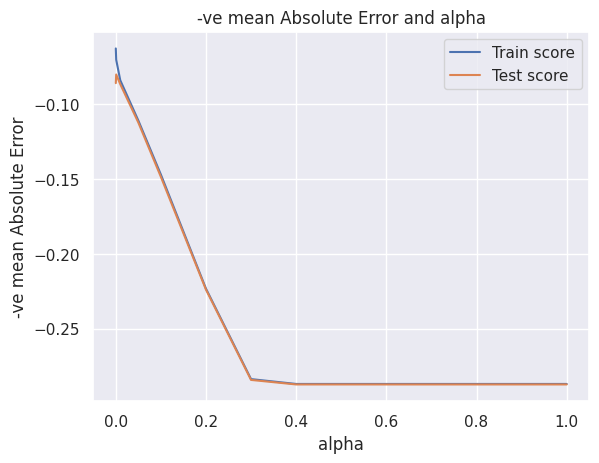

In [82]:
# plotting mean train and test scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('-ve mean Absolute Error')
plt.title("-ve mean Absolute Error and alpha")
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.show()

In [83]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.02043559,  0.10352619,  0.04312338,
        0.        ,  0.0243434 ,  0.        ,  0.04303536,  0.        ,
        0.        , -0.        ,  0.12521758,  0.01391601,  0.        ,
        0.        ,  0.00070295, -0.        , -0.01483115,  0.01500434,
        0.03367061,  0.00849752,  0.        ,  0.        ,  0.00117092,
        0.        ,  0.        , -0.09877729,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.  

In [85]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.994),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.02),
 ('OverallQual', 0.104),
 ('OverallCond', 0.043),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.043),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.015),
 ('Fireplaces', 0.015),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('PropAge', -0.099),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', 0.0)

In [86]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8857372526638595
0.8902256227665828


In [87]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12337742621524833


In [88]:
#### The R2 scores for Train and Test matches well, indicating an optimum model

In [89]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [90]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.994
1   MSSubClass  -0.000
2  LotFrontage   0.000
3      LotArea   0.020
4  OverallQual   0.104

In [91]:
# coefficients in decending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  11.994
13               GrLivArea   0.125
4              OverallQual   0.104
5              OverallCond   0.043
9              TotalBsmtSF   0.043
..                     ...     ...
82       HouseStyle_2.5Unf  -0.000
83       HouseStyle_2Story   0.000
206  SaleCondition_Partial   0.000
19            KitchenAbvGr  -0.015
28                 PropAge  -0.099

[207 rows x 2 columns]

In [92]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  11.994
13     GrLivArea   0.125
4    OverallQual   0.104
5    OverallCond   0.043
9    TotalBsmtSF   0.043
21    GarageArea   0.034
7     BsmtFinSF1   0.024
3        LotArea   0.020
20    Fireplaces   0.015
14  BsmtFullBath   0.014
22    WoodDeckSF   0.008
17      HalfBath   0.001
25     3SsnPorch   0.001
19  KitchenAbvGr  -0.015
28       PropAge  -0.099

In [93]:
# These 3 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(15, 2)

In [94]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'HalfBath', '3SsnPorch', 'KitchenAbvGr', 'PropAge']


In [95]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'HalfBath', '3SsnPorch', 'KitchenAbvGr', 'PropAge']]

X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
1290  -0.701480    -0.786888     1.240965     0.346532    0.125941   
286    0.611108    -0.020154     1.240965    -0.292164   -0.087021   
975   -0.182760     0.746580    -0.540568    -0.928198    0.154981   
376   -1.238242    -0.786888    -0.540568    -0.403935    0.571224   
833    0.119451    -0.020154     0.350198     1.315220    0.067860   

      BsmtFinSF1   LotArea  Fireplaces  BsmtFullBath  WoodDeckSF  HalfBath  \
1290    1.435668  1.846006    0.711292      1.145610    1.125658 -0.716783   
286     0.426709  0.228344    0.711292     -0.804602   -0.771516  1.280622   
975     0.526630 -2.439712   -0.913722      1.145610    0.507196  1.280622   
376    -0.309294 -0.123158   -0.913722     -0.804602   -0.771516 -0.716783   
833    -0.557878  0.309863   -0.913722     -0.804602   -0.771516  1.280622   

      3SsnPorch  KitchenAbvGr   PropAge  
1290  -0.100827     -0.216973  0.280635  
286   -0.100827     -0.216973  0.215345  
975   -0.100827     -0.216973 -1.025166  
376   -0.100827     -0.216973 -0.894586  
833   -0.100827     -0.216973  0.247990

In [96]:
X_train_lasso.shape

(875, 14)

In [97]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'LotArea', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'HalfBath', '3SsnPorch', 'KitchenAbvGr', 'PropAge']]

X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
737    0.828288     1.395671    -0.502345    -0.375870    1.598084   
628    1.478270    -0.731876    -0.502345     0.007880    0.153809   
1026  -0.422754    -0.731876    -0.502345     0.603085   -0.056001   
143    0.129382     0.686489    -0.502345     1.182627    0.509998   
1239   0.089777     1.395671    -0.502345     1.146079   -0.002329   

      BsmtFinSF1   LotArea  Fireplaces  BsmtFullBath  WoodDeckSF  HalfBath  \
737    -0.998917  0.371161    0.711011     -0.830630   -0.732532  1.333831   
628     0.565752  0.783740    2.346773     -0.830630    2.225309  3.383777   
1026    0.678890 -0.048637    2.346773      1.153358   -0.732532 -0.716114   
143     0.635561  0.324958   -0.924751      1.153358    0.538898 -0.716114   
1239    0.031358 -0.143570    0.711011     -0.830630    0.326993 -0.716114   

      3SsnPorch  KitchenAbvGr   PropAge  
737   -0.132252     -0.232133 -1.148609  
628   -0.132252     -0.232133  0.037794  
1026  -0.132252     -0.232133  0.422573  
143   -0.132252     -0.232133 -0.860025  
1239  -0.132252     -0.232133 -1.148609

## Ridge Regression

In [98]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.037754      0.005644         0.018143        0.003281      0.0001   
1       0.034860      0.000758         0.014930        0.001055       0.001   
2       0.022288      0.007441         0.009925        0.003153        0.01   
3       0.024451      0.005992         0.011819        0.002409        0.05   
4       0.028119      0.010555         0.011454        0.003383         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.092389          -0.090794          -0.099470   
1   {'alpha': 0.001}          -0.092391          -0.090758          -0.099398   
2    {'alpha': 0.01}          -0.092365          -0.090420          -0.098753   
3    {'alpha': 0.05}          -0.092086          -0.089558          -0.097007   
4     {'alpha': 0.1}          -0.091672          -0.088735          -0.095755   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.087786  ...        -0.091972        0.004045               27   
1          -0.087771  ...        -0.091945        0.004025               26   
2          -0.087614  ...        -0.091683        0.003859               25   
3          -0.087013  ...        -0.090880        0.003473               24   
4          -0.086311  ...        -0.090137        0.003293               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.060525           -0.060119           -0.058400   
1           -0.060528           -0.060125           -0.058413   
2           -0.060556           -0.060182           -0.058526   
3           -0.060714           -0.060395           -0.058887   
4           -0.060917           -0.060602           -0.059147   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.060672           -0.061986         -0.060341         0.001155  
1           -0.060668           -0.061984         -0.060344         0.001149  
2           -0.060662           -0.061959         -0.060377         0.001103  
3           -0.060706           -0.061963         -0.060533         0.000983  
4           -0.060829           -0.062046         -0.060708         0.000927  

[5 rows x 21 columns]

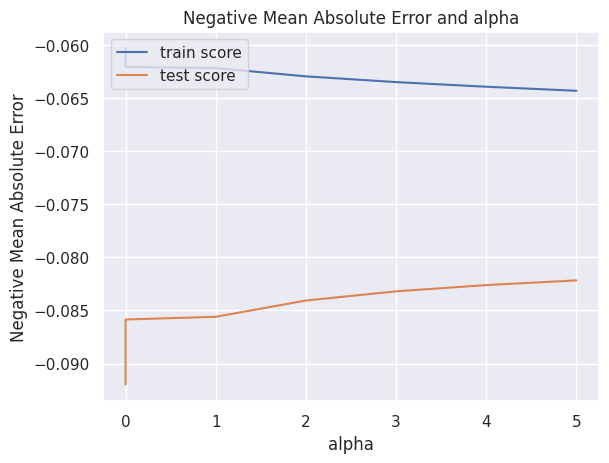

In [100]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [101]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.17517579e-03,  4.66574975e-03,  2.92023235e-02,  5.76579439e-02,
        4.52953856e-02, -1.76534596e-03,  2.00977794e-02,  5.99712993e-03,
        4.44093779e-02,  2.91807563e-02,  5.27340540e-02,  4.08268679e-03,
        7.06827694e-02,  2.28402441e-02,  3.97996979e-03,  2.03164692e-02,
        1.65429444e-02, -1.47011803e-03, -1.68056450e-02,  9.53698388e-03,
        1.49828947e-02,  1.44356298e-02, -2.50846542e-03,  1.02200443e-02,
        5.69523090e-03,  1.04913386e-02,  6.40199857e-03, -7.59257464e-02,
        1.07954230e-01,  8.29768632e-02,  6.81384148e-02,  6.46410567e-02,
        3.58889878e-02, -4.84410786e-02,  5.07070411e-03,  3.08475288e-02,
       -5.35055273e-02, -1.06156930e-02,  1.22429188e-04, -3.15451248e-02,
        0.00000000e+00, -1.87349028e-02, -1.79907979e-02,  2.82139981e-02,
        3.69610914e-02,  6.09495507e-03, -1.58904286e-02,  1.03546373e-01,
       -7.63920235e-02, -2.20535960e-02, -2.70123210e-02, -6.35906996e-02,
       -3.83738643e-02, -

In [102]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.873),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.005),
 ('LotArea', 0.029),
 ('OverallQual', 0.058),
 ('OverallCond', 0.045),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.053),
 ('LowQualFinSF', 0.004),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.023),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.02),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', -0.001),
 ('KitchenAbvGr', -0.017),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.015),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.01),
 ('PoolArea', 0.006),
 ('PropAge', -0.076),
 ('MSZoning_FV', 0.108),
 ('MSZoning_RH', 0.083),
 ('MSZoning_RL', 0.068),
 ('MSZoning_RM', 0.065),
 ('LotShape_IR2', 0.036),
 ('LotShape_IR3', -0.048),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.031),
 ('LandContour_Low', -0.054),
 ('LandContour_Lvl', -0.011),
 ('LotConfig_CulDSac', 0.0),
 ('Lot

In [103]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.934741360608845
0.9044754555045873


In [104]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11509135493253878


#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [105]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
paraRFE=paraRFE.sort_values(by=['Coeff'], axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.873
64   Neighborhood_StoneBr   0.127
29            MSZoning_FV   0.108
48   Neighborhood_Crawfor   0.104
70        Condition1_PosN   0.084
..                    ...     ...
49   Neighborhood_Edwards  -0.076
28                PropAge  -0.076
105   Exterior2nd_Brk Cmn  -0.084
91    Exterior1st_BrkComm  -0.084
122          ExterQual_Fa  -0.088

[207 rows x 2 columns]

In [106]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.873
64   Neighborhood_StoneBr   0.127
29            MSZoning_FV   0.108
48   Neighborhood_Crawfor   0.104
70        Condition1_PosN   0.084
..                    ...     ...
49   Neighborhood_Edwards  -0.076
28                PropAge  -0.076
105   Exterior2nd_Brk Cmn  -0.084
91    Exterior1st_BrkComm  -0.084
122          ExterQual_Fa  -0.088

[202 rows x 2 columns]

In [107]:
predRFE.shape

(202, 2)

### Observation:
#### The Ridge Regression performs better in terms of R2 values of Train and Test

#### Equation can be formulated using the features and coefficients obtained by Lasso

In [109]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14']), inplace = True)
pred

Variable   Coeff
C        constant  11.994
x1      GrLivArea   0.125
x2    OverallQual   0.104
x3    OverallCond   0.043
x4    TotalBsmtSF   0.043
x5     GarageArea   0.034
x6     BsmtFinSF1   0.024
x7        LotArea   0.020
x8     Fireplaces   0.015
x9   BsmtFullBath   0.014
x10    WoodDeckSF   0.008
x11      HalfBath   0.001
x12     3SsnPorch   0.001
x13  KitchenAbvGr  -0.015
x14       PropAge  -0.099

### These are the final features that should be selected for predicting the price of house

### Hence the equation:
    
####    Log(Y) = C + 0.125(x1) + 0.104(x2) + 0.043(x3) + 0.043(x4) + 0.034(x5) + 0.024(x6) + 0.020(x7) +  0.015(x8) + 0.014(x9) + 0.008(x10) + 0.001(x11) + 0.001(x12) - 0.015(x13) - 0.099(x14) + Error term(RSS + alpha * (sum of absolute value of coefficients)

### INFERENCE


#### Based on these features we can predict house prices and decide to invest or not.

#### High positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  GarageArea   |Size of garage in square feet  |
        
#### High negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   | KitchenAbvGr | Kitchens above grade |
    

#### Surprise Housing can invest when the market value of the property is lower than the Predicted Sale Price.

